# Graph circos plot

## Create dataframe for chr, start, end, qvalue

In [1]:
from circos import CircosPlot

# Load your genomic data (assuming it's in a CSV file)
import pandas as pd
import numpy as np

# Load your genomic data from a CSV file
data = pd.read_csv('./amp.csv', skiprows=1 ,usecols=[0, 1, 2, 8], names=['chr', 'start', 'end', 'qvalue'])

print(data.head())

data['qvalue'] = np.log10(data['qvalue'])

# Display the first few rows of the transformed data to ensure it's correct
print(data.head())


    chr      start        end        qvalue
0  chr1   39109153   41523062  1.280000e-21
1  chr1  148646436  149486905  5.190000e-18
2  chr1  232526850  233617929  8.670000e-07
3  chr1  154088696  154329131  3.880000e-09
4  chr1   36338557   36480225  2.120000e-11
    chr      start        end     qvalue
0  chr1   39109153   41523062 -20.892790
1  chr1  148646436  149486905 -17.284833
2  chr1  232526850  233617929  -6.061981
3  chr1  154088696  154329131  -8.411168
4  chr1   36338557   36480225 -10.673664


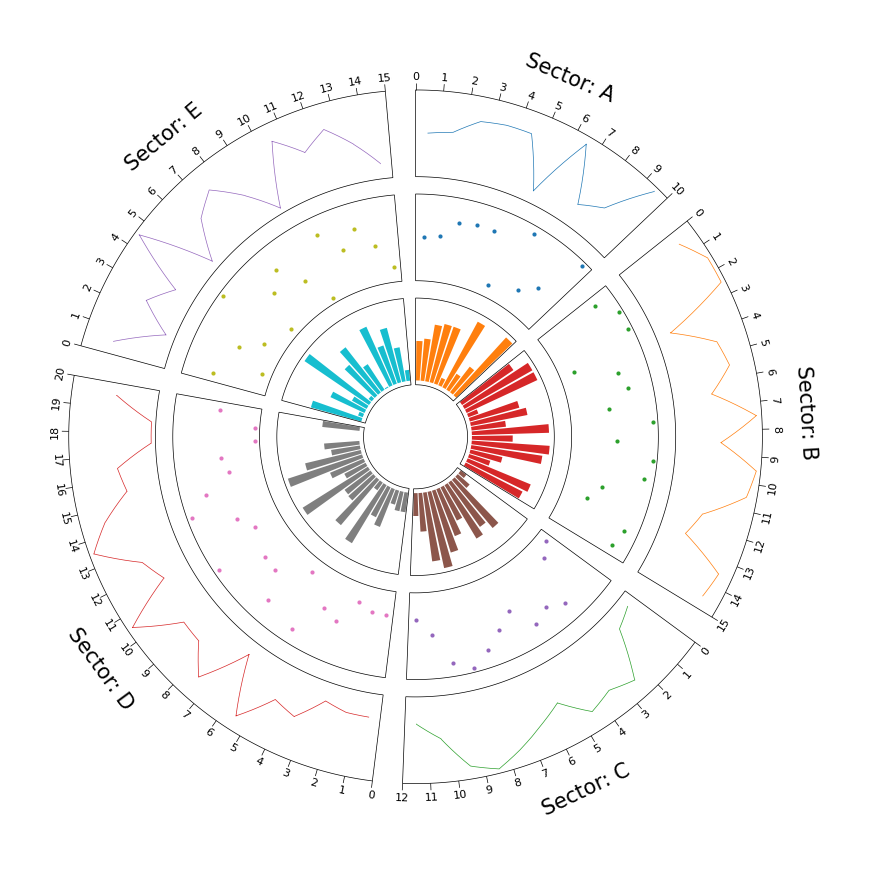

In [15]:
from pycirclize import Circos
import numpy as np
np.random.seed(0)

sectors = {"A": 10, "B": 15, "C": 12, "D": 20, "E": 15}
circos = Circos(sectors, space=5)
for sector in circos.sectors:
    # Plot sector name
    sector.text(f"Sector: {sector.name}", r=110, size=15)
    # Create x positions & randomized y values for data plotting
    x = np.arange(sector.start, sector.end) + 0.5
    y = np.random.randint(0, 100, len(x))
    # Plot line
    line_track = sector.add_track((75, 100), r_pad_ratio=0.1)
    line_track.axis()
    line_track.xticks_by_interval(1)
    line_track.line(x, y)
    # Plot points
    points_track = sector.add_track((45, 70), r_pad_ratio=0.1)
    points_track.axis()
    points_track.scatter(x, y)
    # Plot bar
    bar_track = sector.add_track((15, 40), r_pad_ratio=0.1)
    bar_track.axis()
    bar_track.bar(x, y)

fig = circos.plotfig()

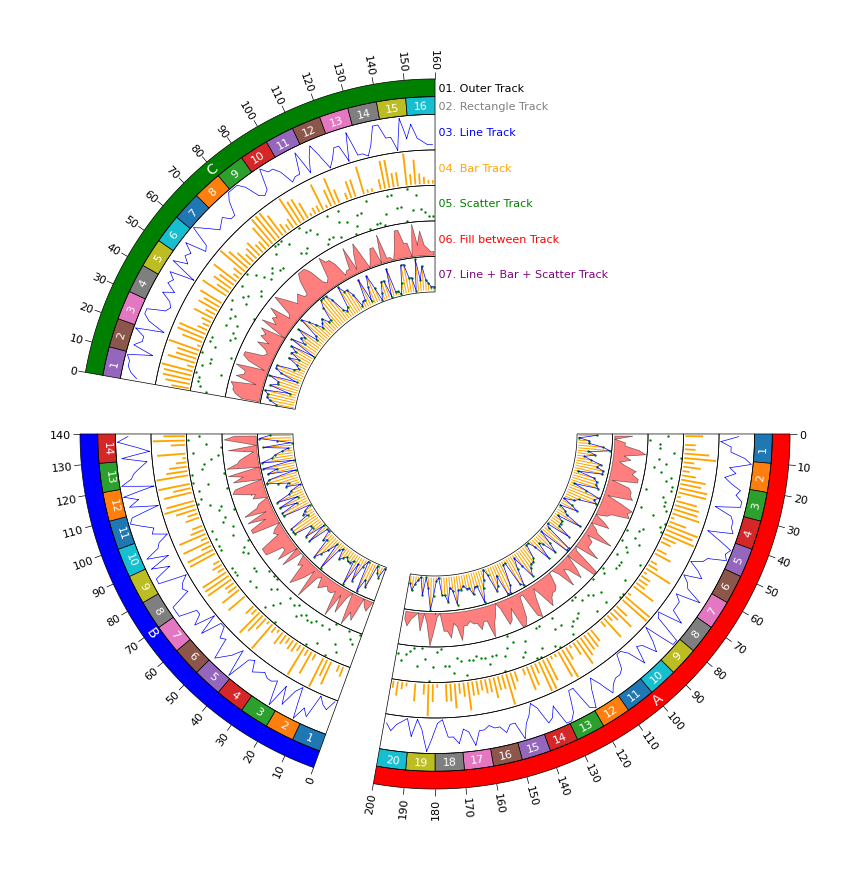

In [16]:
from pycirclize import Circos
from pycirclize.utils import ColorCycler
import numpy as np

np.random.seed(0)
ColorCycler.set_cmap("tab10")

sectors = {"A": 200, "B": 140, "C": 160}
sector_colors = {"A": "red", "B": "blue", "C": "green"}
circos = Circos(sectors, space=10, start=90, end=360, endspace=False)

for sector in circos.sectors:
    # Outer Track
    outer_track = sector.add_track((95, 100))
    outer_track.text(sector.name, color="white")
    outer_track.axis(fc=sector_colors[sector.name])
    outer_track.xticks_by_interval(interval=10, label_orientation="vertical")
    # Rectangle Track
    rect_track = sector.add_track((90, 95))
    rect_size = 10
    for i in range(int(rect_track.size / rect_size)):
        x1, x2 = i * rect_size, i * rect_size + rect_size
        rect_track.rect(x1, x2, ec="black", lw=0.5, color=ColorCycler())
        rect_track.text(str(i + 1), (x1 + x2) / 2, size=8, color="white")
    # Generate random x, y plot data
    x = np.arange(1, int(sector.size), 2)
    y = np.random.randint(0, 10, len(x))
    # Line Track
    line_track = sector.add_track((80, 90), r_pad_ratio=0.1)
    line_track.axis()
    line_track.line(x, y, color="blue")
    # Scatter Track
    scatter_track = sector.add_track((70, 80), r_pad_ratio=0.1)
    scatter_track.axis()
    scatter_track.bar(x, y, width=0.8, color="orange")
    # Bar Track
    bar_track = sector.add_track((60, 70), r_pad_ratio=0.1)
    bar_track.axis()
    bar_track.scatter(x, y, color="green", s=3)
    # Fill Track
    fill_track = sector.add_track((50, 60), r_pad_ratio=0.1)
    fill_track.axis()
    fill_track.fill_between(x, y, y2=0, fc="red", ec="black", lw=0.5, alpha=0.5)
    # Line + Bar + Scatter Track
    line_bar_scatter_track = sector.add_track((40, 50), r_pad_ratio=0.1)
    line_bar_scatter_track.axis()
    line_bar_scatter_track.line(x, y, color="blue")
    line_bar_scatter_track.bar(x, y, width=0.8, color="orange")
    line_bar_scatter_track.scatter(x, y, color="green", s=3)

# Plot text description
text_common_kws = dict(ha="left", va="center", size=8)
circos.text(" 01. Outer Track", r=97.5, color="black", **text_common_kws)
circos.text(" 02. Rectangle Track", r=92.5, color="grey", **text_common_kws)
circos.text(" 03. Line Track", r=85, color="blue", **text_common_kws)
circos.text(" 04. Bar Track", r=75, color="orange", **text_common_kws)
circos.text(" 05. Scatter Track", r=65, color="green", **text_common_kws)
circos.text(" 06. Fill between Track", r=55, color="red", **text_common_kws)
circos.text(" 07. Line + Bar + Scatter Track", r=45, color="purple", **text_common_kws)

fig = circos.plotfig()

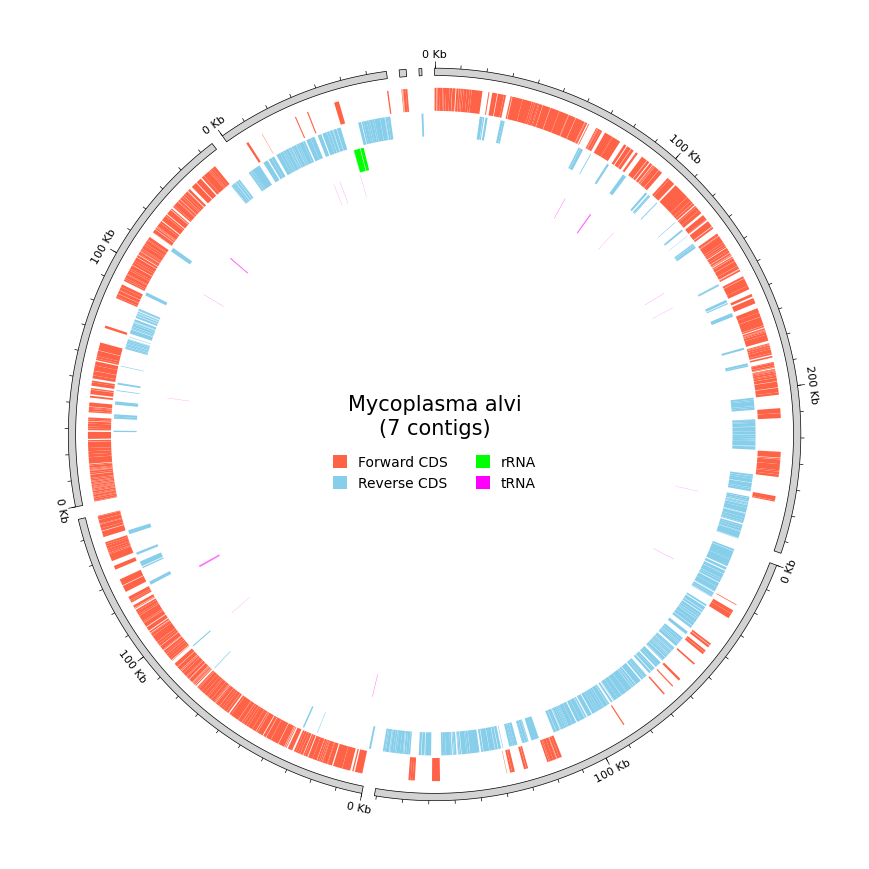

In [20]:
from pycirclize import Circos
from pycirclize.parser import Gff, Genbank
from pycirclize.utils import load_prokaryote_example_file
from matplotlib.patches import Patch

# Case1. Load `GFF` contig genomes
# https://github.com/moshi4/pycirclize-data/blob/main/prokaryote/mycoplasma_alvi.gff
gff_file = load_prokaryote_example_file("mycoplasma_alvi.gff")
parser = Gff(gff_file)

# Case2. Load `Genbank` contig genomes
# https://github.com/moshi4/pycirclize-data/blob/main/prokaryote/mycoplasma_alvi.gbk
# gbk_file = load_prokaryote_example_file("mycoplasma_alvi.gbk")
# parser = Genbank(gbk_file)

# Get contig genome seqid & size, features dict
seqid2size = parser.get_seqid2size()
seqid2features = parser.get_seqid2features(feature_type=None)

circos = Circos(seqid2size, space=2)
circos.text(f"Mycoplasma alvi\n({len(circos.sectors)} contigs)", r=5, size=15)
for sector in circos.sectors:
    # Plot outer track
    outer_track = sector.add_track((98, 100))
    outer_track.axis(fc="lightgrey")
    major_interval = 100000
    minor_interval = int(major_interval / 10)
    if sector.size > minor_interval:
        outer_track.xticks_by_interval(major_interval, label_formatter=lambda v: f"{v / 1000:.0f} Kb")
        outer_track.xticks_by_interval(minor_interval, tick_length=1, show_label=False)

    # Plot forward/reverse CDS, rRNA, tRNA tracks
    f_cds_track = sector.add_track((88, 95), r_pad_ratio=0.1)
    r_cds_track = sector.add_track((81, 88), r_pad_ratio=0.1)
    rrna_track = sector.add_track((74, 81), r_pad_ratio=0.1)
    trna_track = sector.add_track((67, 74), r_pad_ratio=0.1)
    for feature in seqid2features[sector.name]:
        if feature.type == "CDS":
            if feature.location.strand == 1:
                f_cds_track.genomic_features([feature], fc="tomato")
            else:
                r_cds_track.genomic_features([feature], fc="skyblue")
        elif feature.type == "rRNA":
            rrna_track.genomic_features([feature], fc="lime")
        elif feature.type == "tRNA":
            trna_track.genomic_features([feature], fc="magenta")

fig = circos.plotfig()
_ = circos.ax.legend(
    handles=[
        Patch(color="tomato", label="Forward CDS"),
        Patch(color="skyblue", label="Reverse CDS"),
        Patch(color="lime", label="rRNA"),
        Patch(color="magenta", label="tRNA"),
    ],
    bbox_to_anchor=(0.5, 0.45),
    loc="center",
    ncols=2,
)

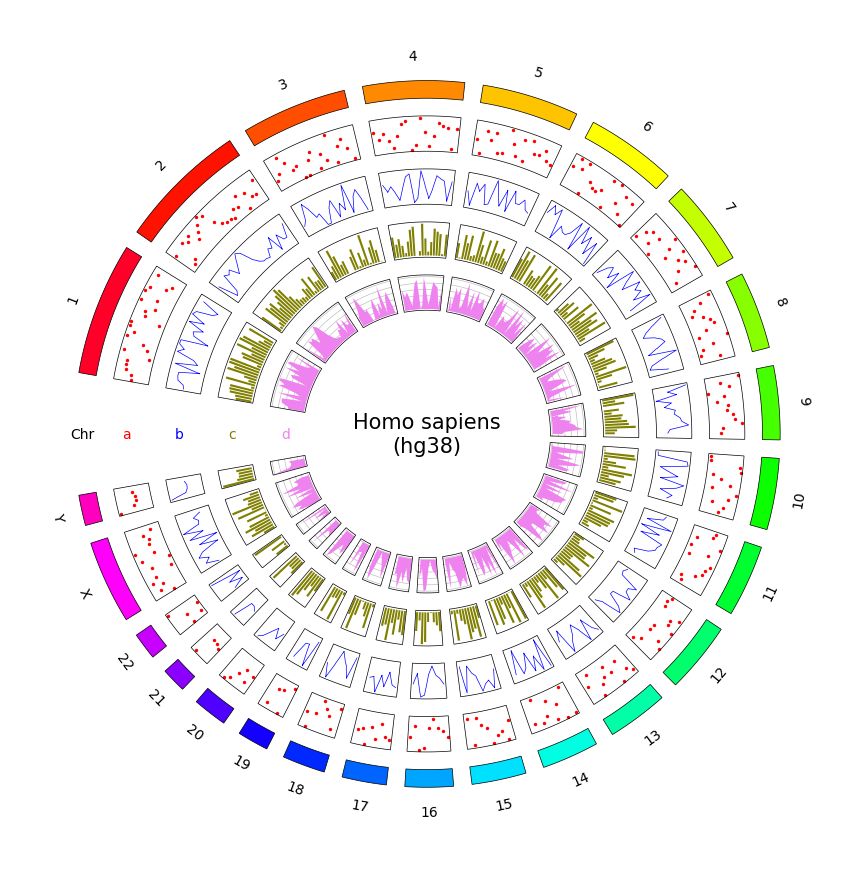

In [21]:
from pycirclize import Circos
from pycirclize.utils import ColorCycler, load_eukaryote_example_dataset
import numpy as np
np.random.seed(0)

# Load hg38 dataset (https://github.com/moshi4/pycirclize-data/tree/main/eukaryote/hg38)
chr_bed_file = load_eukaryote_example_dataset("hg38")[0]

# Initialize Circos from BED chromosomes
circos = Circos.initialize_from_bed(chr_bed_file, start=-80, end=260, space=3, endspace=False)
circos.text("Homo sapiens\n(hg38)", size=15)

# Create chromosome color dict
ColorCycler.set_cmap("gist_rainbow")
chr_names = [s.name for s in circos.sectors]
colors = ColorCycler.get_color_list(len(chr_names))
chr_name2color = {name: color for name, color in zip(chr_names, colors)}

for sector in circos.sectors:
    # Plot chromosome outer track
    sector.text(sector.name.replace("chr", ""))
    color = chr_name2color[sector.name]
    outer_track = sector.add_track((95, 100))
    outer_track.axis(fc=color)
    # Create example x,y plot data
    step = 10000000
    x = np.arange(sector.start + (step / 2), sector.end - (step / 2), step)
    y = np.random.randint(0, 100, size=len(x))
    # Scatter track
    track1 = sector.add_track((80, 90), r_pad_ratio=0.1)
    track1.axis()
    track1.scatter(x, y, s=6, color="red")
    # Line track
    track2 = sector.add_track((65, 75), r_pad_ratio=0.1)
    track2.axis()
    track2.line(x, y, color="blue")
    # Bar track
    track3 = sector.add_track((50, 60), r_pad_ratio=0.1)
    track3.axis()
    track3.bar(x, y, width=step * 0.7, color="olive")
    # Fill between track
    track4 = sector.add_track((35, 45), r_pad_ratio=0.1)
    track4.axis()
    track4.grid()
    track4.fill_between(x, y, color="violet")
    # Plot track labels
    if sector.name == circos.sectors[0].name:
        circos.text("Chr", r=outer_track.r_center, deg=-90)
        circos.text("a", r=track1.r_center, deg=-90, color="red")
        circos.text("b", r=track2.r_center, deg=-90, color="blue")
        circos.text("c", r=track3.r_center, deg=-90, color="olive")
        circos.text("d", r=track4.r_center, deg=-90, color="violet")

fig = circos.plotfig()